In [221]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 
from mpl_toolkits.mplot3d import Axes3D

In [222]:
a = 6.
b = -1.
N = 100
sig = .4 # écart type

In [245]:
def tirage_aleatoires(N, sig, mu, a, b):
    X = np.random.rand(N)
    Eps = mu + np.random.randn(N) * sig
    return X, a*X + b + Eps
#
X,Y = tirage_aleatoires(N,sig,mu,a,b)


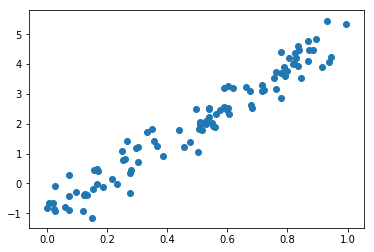

In [246]:
plt.scatter(X,Y)
plt.show()

In [250]:
def estimationAB(X,Y):
    covXY= np.cov([X,Y]) #Retourne un tableau 2*2, covXY[0][0]=cov(X), covXY[1][1]=cov(Y), covXY[0][1]=covXY[1][0]=cov(X,Y)
    Ex = np.mean(X)
    Ey = np.mean(Y)
    Vx = np.var(X)
    
    a = covXY[0][1] / Vx
    b = Ey - (covXY[0][1]/Vx)*Ex
    
    return a,b
a,b=estimationAB(X,Y)
print(a,b)

6.04734446562 -0.995821734522


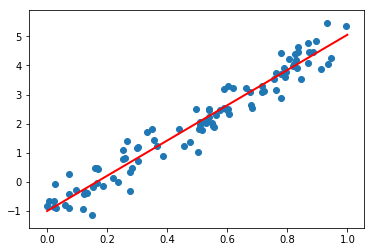

In [251]:
#dessiner la droite  Y = aX + b

plt.plot([a* x + b for x in range(2)], 'r-', lw=2)
plt.scatter(X,Y)
plt.show()

[ 5.98687102 -0.96580427]


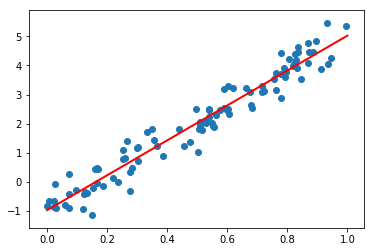

In [253]:

def estimationMoindresCarres(X, Y):
    Xc = np.hstack((X.reshape(N,1),np.ones((N,1))))
    Xc += 0
    return np.linalg.solve(Xc.transpose().dot(Xc), Xc.transpose().dot(Y))
#teste
h = estimationMoindresCarres(X, Y)
plt.plot([h[0] * x + h[1] for x in range(2)], 'r-', lw=2)
plt.scatter(X,Y)
print(h)
plt.show()

In [257]:
def descenteGradient(X, ylin):
    eps = 5e-3
    nIterations = 30
    w = np.zeros(X.shape[1]) #init a 0
    allw = [w]
    for i in range(nIterations):
        w = w - eps * 2* X.transpose().dot(X.dot(w) - ylin)
        allw.append(w)
    return w, np.array(allw)

In [258]:
def afficheDescGradient(X, ylin, allD, D_star):
    ngrid = 20
    d1range = np.linspace(-0.5, 8, ngrid)
    d2range = np.linspace(-1.5, 1.5, ngrid)
    d1, d2 = np.meshgrid(d1range, d2range)
    cost = np.array([[np.log(((X.dot(np.array([d1i,d2j]))-ylin)**2).sum()) for d1i in d1range] for d2j in d2range])
    fig = plt.figure()
    plt.contour(d1, d2, cost)
    plt.scatter(D_star[0], D_star[1], c='r')
    plt.plot(allD[:,0], allD[:,1],'b+-', lw=2 )
    plt.show()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(d1, d2, cost, rstride = 1, cstride=1 )   
    plt.show()

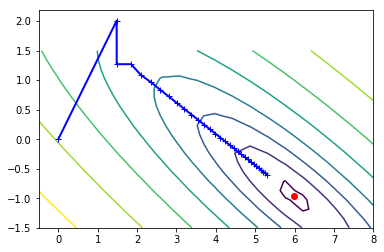

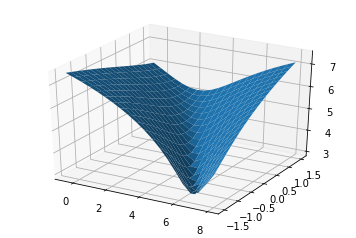

In [260]:
#Approche Descente Gradient
T = np.array([0,1])
Xc = np.hstack((X.reshape(N,1),np.ones((N,1))))
D_est, allD = descenteGradient(Xc, Y)
#print(D_est,allD)
#Affichage descente gradient
afficheDescGradient(Xc, Y, allD, h)

In [266]:
def Donnes_de_JouetsQuad(N,sig,mu, a, b, c):
    X = np.random.rand(N)
    Eps = mu + np.random.randn(N) * sig
    return X, a * (X**2) + b * X + c + Eps



def estimationM_C_Q(X, Y):
    return np.linalg.solve(Xe.transpose().dot(Xe), Xe.transpose().dot(Y))

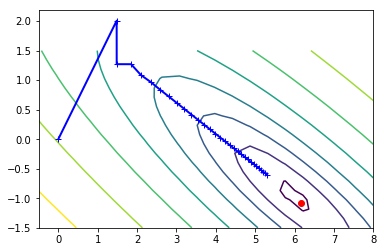

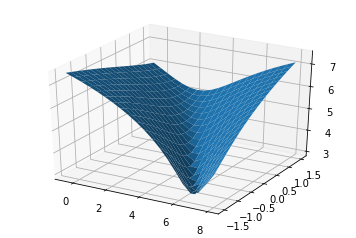

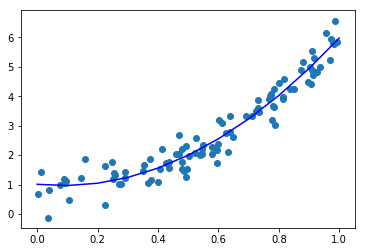

In [267]:
   #Affichage descente gradient
afficheDescGradient(Xc, Y, allD, D_star)
c=1
Xquad, Yquad = Donnes_de_JouetsQuad(N, sig,mu, a, b, c)
Xe = np.hstack( ((Xquad**2).reshape(N,1), Xquad.reshape(N,1), np.ones((N,1))) )
Dquad = estimationM_C_Q(Xe, Yquad)
T = np.arange(0,1.1,.1)
plt.figure()
plt.scatter(Xquad, Yquad)
plt.plot(T, Dquad[0]*(T**2) + Dquad[1]*T + Dquad[2], 'b')
plt.show()